## My Name : Lilian Steven
## my email : liliansteven420@gmail.com

## Steps of data analysis : 

**1. Business Understanding and defining the question.**

**2. Data Understanding**

  - Understand what each column and row represent

  - Check the distributions

  - Check the outliers

  - Conduct Univariate and Bivariate analysis

  - Define the useful features

**3. Data Preparation/Preprocessing**

  - Data cleaning

  - Checking for duplicate rows

  - Handling null values

  - Dealing with outliers

  - Dealing with categorical features

  - Feature Engineering (Will discuss later)

## Q1. Business Understanding and defining the question.

- age: age of primary beneficiary


- sex: insurance contractor gender, female, male


- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
	objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9


- children: Number of children covered by health insurance / Number of dependents


- smoker: Smoking


- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.


- charges: Individual medical costs billed by health insurance

#### 1.1 Importing inportant libraries : 

In [28]:
import numpy as np 
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

#kaggle = True

#if kaggle:
#    insurance_path = '/kaggle/input/insurance/insurance.csv'
#else:
#    insurance_path = './data/insurance.csv'

In [2]:
df = pd.read_csv(r"C:\Users\Laptop\Downloads\Assigment 3\dataset\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### **1- Which columns are categorical and which columns are numerical?**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### **2- checking for missing value :**

In [5]:
missing_value = df.isnull().sum()
missing_value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 3- Identifying & handling outliers : 

age boxplot :


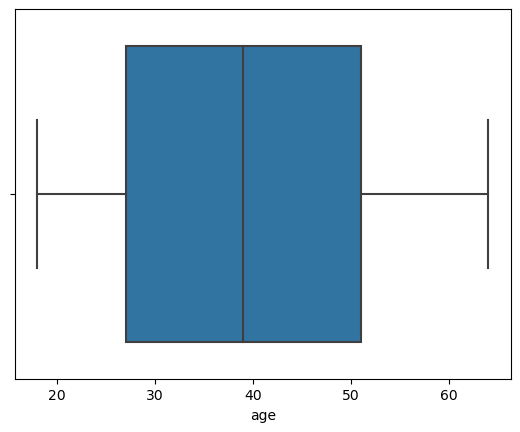

bmi boxplot :


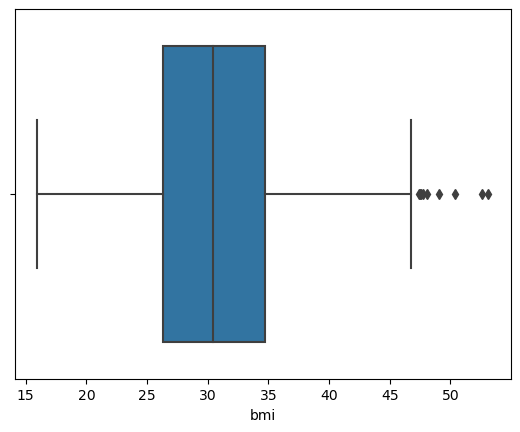

children boxplot :


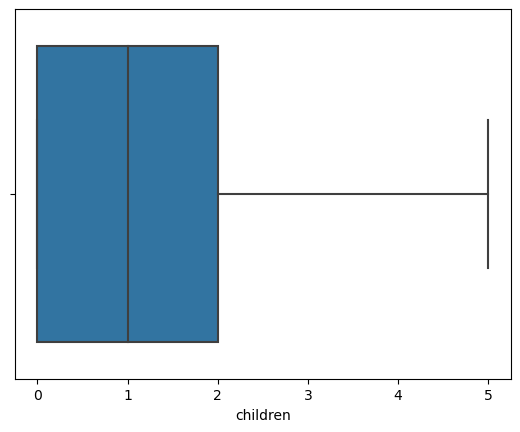

charges boxplot :


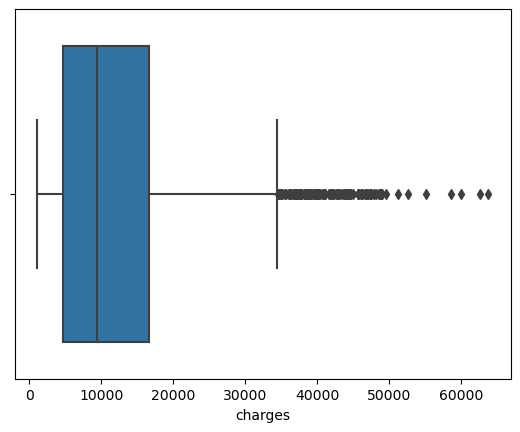

In [6]:
for col in df.columns:
    if df[col].dtype != 'object':
        bp = sns.boxplot(data = df, x = col)
        print(f"{col} boxplot :")
        plt.show()


> #### from the plotting above we see that columns: bmi  and charges, had outliers 

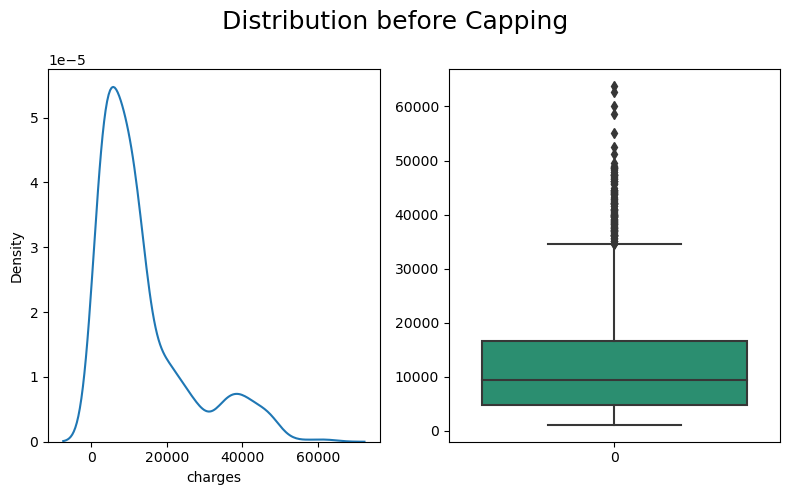

In [7]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df["charges"], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df["charges"], palette="Dark2")
plt.tight_layout()
plt.show()

### Handling oultiers using Capping & Inter-Quartile Range (IQR)

### Handling column charges : 

In [8]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df["charges"].quantile(0.25)
q2 = df["charges"].quantile(0.75)
print(f"q1 : {q1}")
print(f"q1 : {q2}")

q1 : 4740.28715
q1 : 16639.912515


In [9]:
# finding out the value of Inter Quartile Range
IQR = q2 - q1  
IQR

11899.625365

In [10]:
#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5* IQR)
print(f"max Limit : {max_limit}")
print(f"min Limit : {min_limit}")

max Limit : 34489.350562499996
min Limit : -13109.1508975


In [11]:
tips_outliers = np.where(df["charges"] > max_limit, True,
                np.where(df["charges"] < min_limit, True, False))
print(tips_outliers.shape)
tips_outliers

(1338,)


array([False, False, False, ..., False, False, False])

In [12]:
df = df.loc[~(tips_outliers)]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


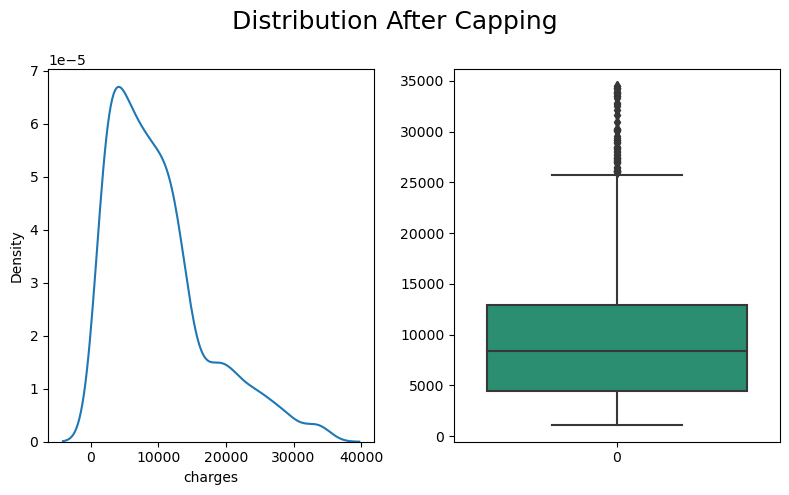

In [13]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution After Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df["charges"], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df["charges"], palette="Dark2")
plt.tight_layout()
plt.show()

### Handling column bmi  : 

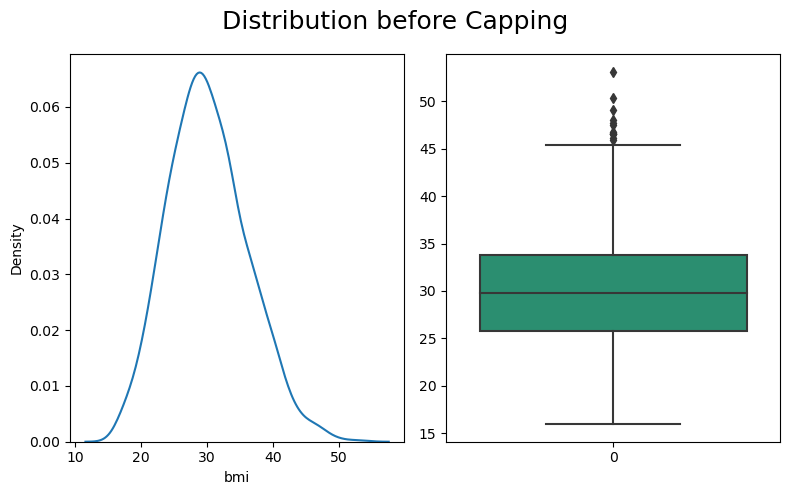

In [14]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df["bmi"], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df["bmi"], palette="Dark2")
plt.tight_layout()
plt.show()

In [15]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df["bmi"].quantile(0.25)
q2 = df["bmi"].quantile(0.75)
print(f"q1 : {q1}")
print(f"q1 : {q2}")


q1 : 25.8
q1 : 33.82


In [16]:
# finding out the value of Inter Quartile Range
IQR_bmi= q2 - q1  
IQR_bmi

8.02

In [17]:
#defining max and min limits
max_limit = q2 + (1.5 * IQR_bmi)
min_limit = q1 - (1.5* IQR_bmi)
print(f"max Limit : {max_limit}")
print(f"min Limit : {min_limit}")

max Limit : 45.85
min Limit : 13.770000000000001


In [18]:
df_skew_new_bmi = np.where(df["bmi"] > max_limit , True,
                  np.where(df["bmi"] < min_limit , True, False))
df_skew_new_bmi

array([False, False, False, ..., False, False, False])

In [19]:
df = df.loc[~(df_skew_new_bmi)]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


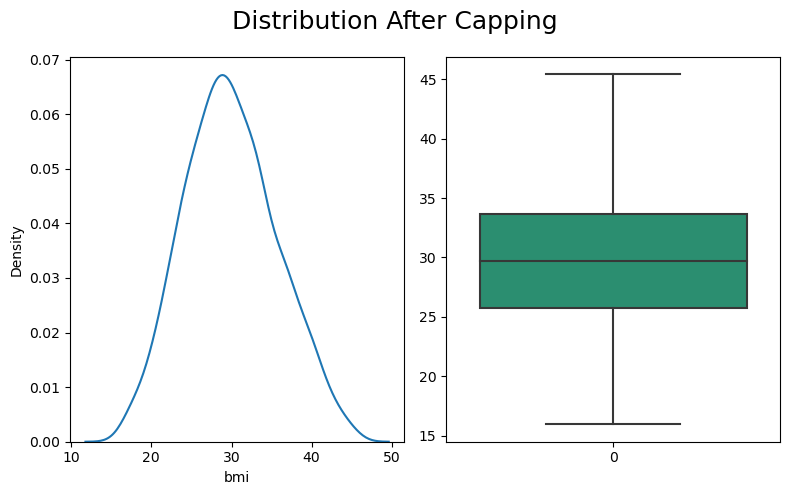

In [20]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution After Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df["bmi"], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df["bmi"], palette="Dark2")
plt.tight_layout()
plt.show()

<h2>3- Scale and Normalize data</h2>

In [31]:
original_df = df 

### normalizing the categorical data 

In [20]:
labelencoder = LabelEncoder()
df["sex"] = labelencoder.fit_transform(df["sex"])
df["sex"].unique()
df["sex"]

C:\Users\Laptop\AppData\Local\Temp\ipykernel_7480\3758397930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"] = labelencoder.fit_transform(df["sex"])


0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1186, dtype: int32

**0 ---> For Female**

**1 ---> For male**

### comparing beween the data of charge before encoding and After encoding :

In [21]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [22]:
df["smoker"] = labelencoder.fit_transform(df["smoker"])
df["smoker"].unique()

C:\Users\Laptop\AppData\Local\Temp\ipykernel_7480\2492036408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["smoker"] = labelencoder.fit_transform(df["smoker"])


array([1, 0])

**1 ===>  For  Yes**

**0 ===>  For   No**

In [23]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [24]:
df["region"] = labelencoder.fit_transform(df["region"])
df["region"].unique()

C:\Users\Laptop\AppData\Local\Temp\ipykernel_7480\3697744559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["region"] = labelencoder.fit_transform(df["region"])


array([3, 2, 1, 0])

### Checking for duplicate :

In [37]:
df.duplicated().sum()

1

In [43]:
df.drop_duplicates(inplace = True)
df

C:\Users\Laptop\AppData\Local\Temp\ipykernel_7480\870522923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [44]:
df.duplicated().sum()

0